# Example of the aitlas toolbox in the context of object detection in remote sensing images

## Import the required packages

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionRfiYoloDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN

## Visualize images and objects witn bounding boxes

Total number of patches: 3940


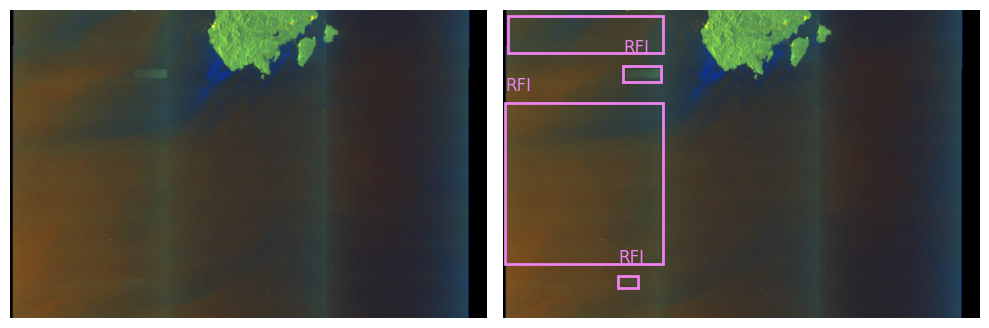

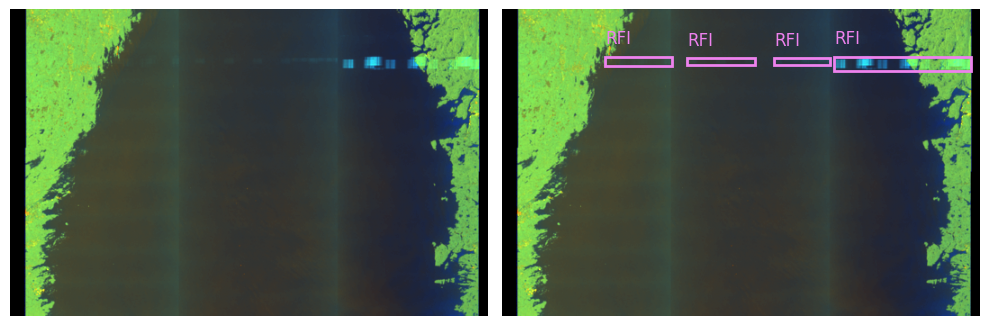

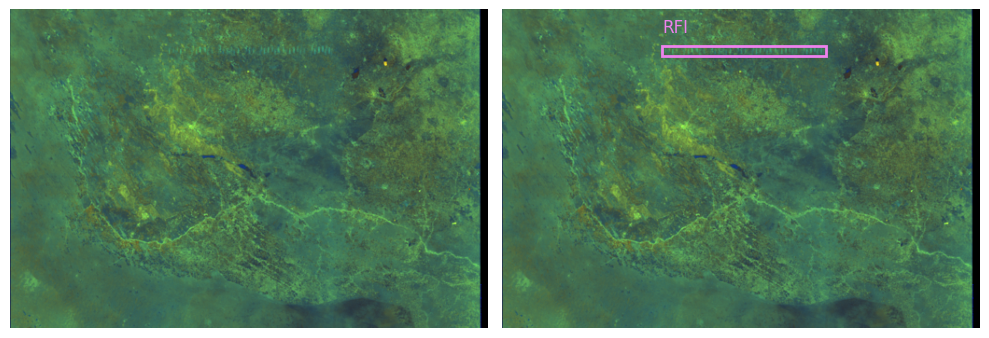

In [5]:
dataset_config = {
    "data_dir": "/home/dragik/data/rfi/rfi_quick_looks/",
    "annotation_dir": "/home/dragik/data/rfi/YOLO/",
}
dataset = ObjectDetectionRfiYoloDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(17);
dataset.show_image(800);
dataset.show_image(1200);

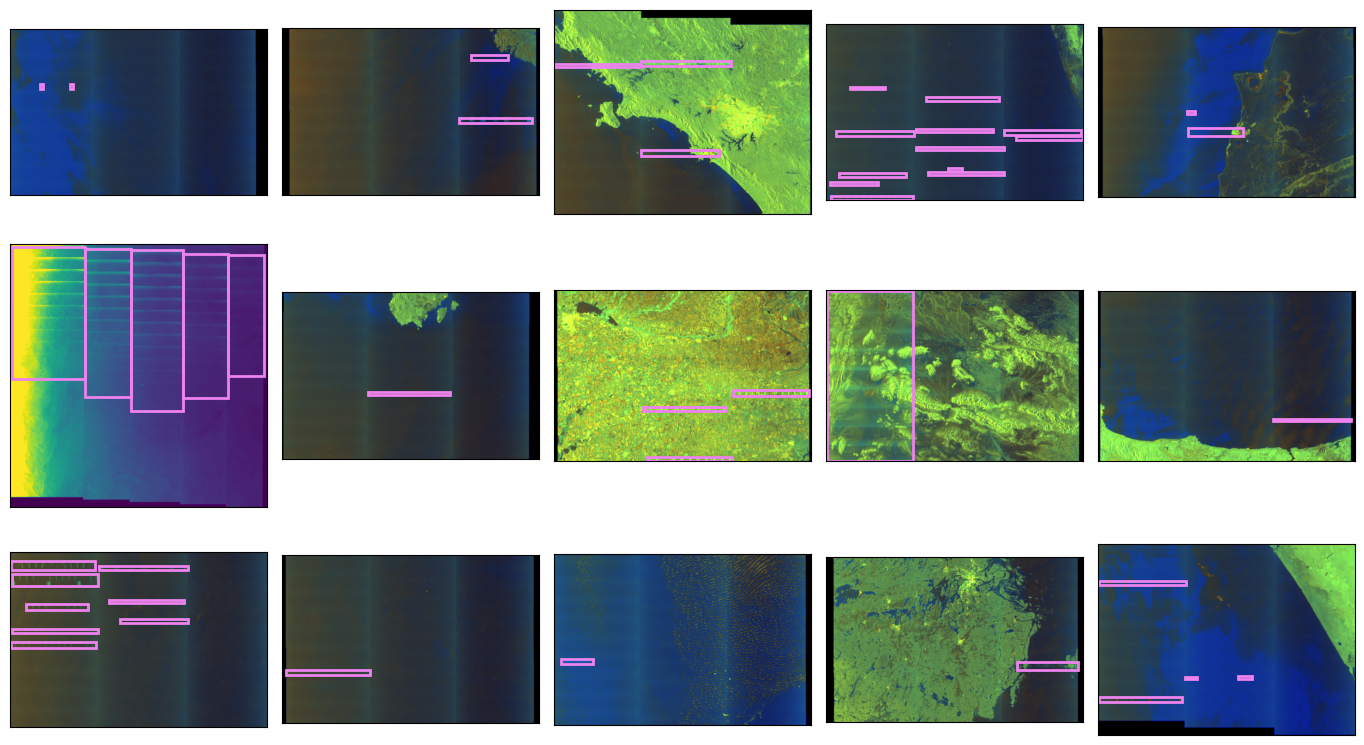

In [6]:
dataset.show_batch(15);

In [7]:
dataset.data_distribution_table()

,Label,Count
0,RFI,11724
1,Other Anomaly,301


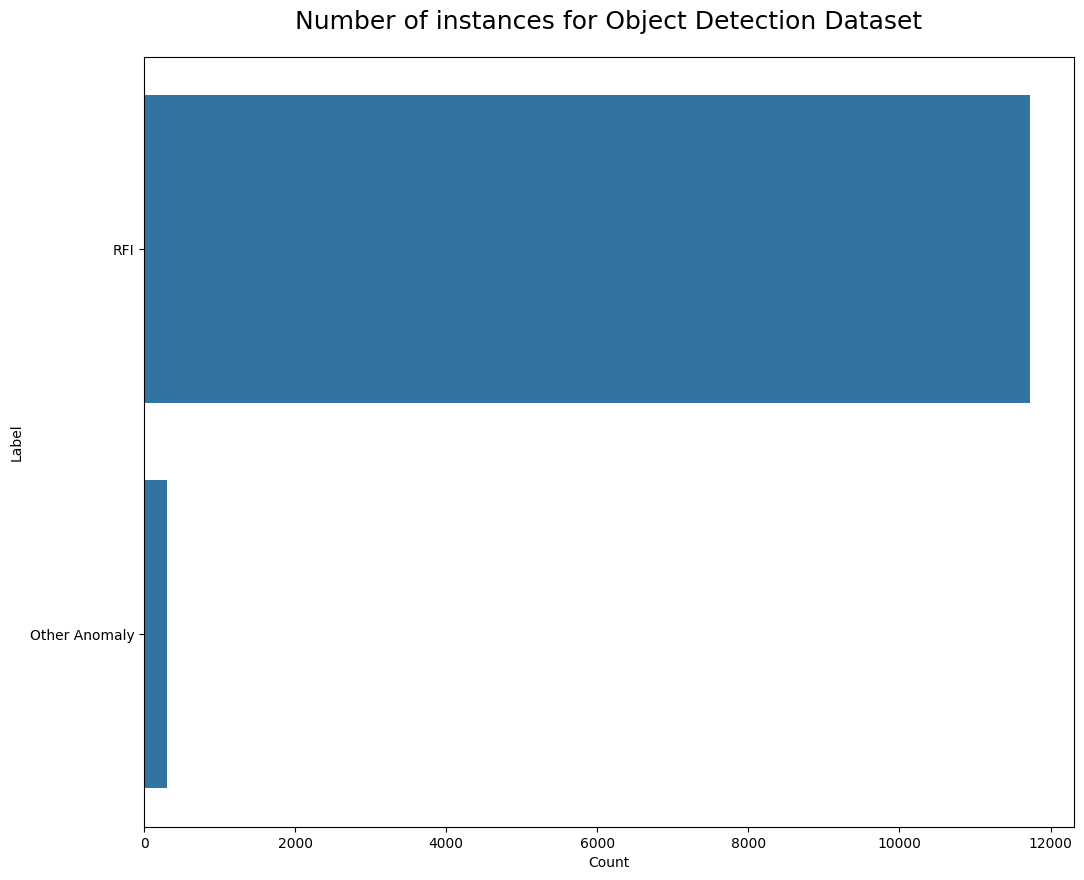

In [8]:
dataset.data_distribution_barchart();

## Load train data

In [5]:
train_dataset_config = {
    "batch_size": 8,
    "shuffle": True,
    "data_dir": "/home/dragik/data/rfi/training/images/",
    "annotation_dir": "/home/dragik/data/rfi/training/labels/YOLO/",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}
train_dataset = ObjectDetectionRfiYoloDataset(train_dataset_config)

print(f"Total number of train images: {len(train_dataset)}")

Total number of train images: 3154


## Create the model

In [6]:
epochs = 10
model_directory = "/home/dragik/data/rfi/experiments/yolo/"
model_config = {
    "num_classes": 2,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}

model = FasterRCNN(model_config)
model.prepare()

## Start the training

In [7]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2024-09-11 14:02:51,770 INFO Starting training.
training: 100%|███████████████████████████████████████████████████████████████████████| 395/395 [02:10<00:00,  3.03it/s]
2024-09-11 14:05:03,287 INFO epoch: 1, time: 131, loss:  0.23474
testing on train set: 100%|███████████████████████████████████████████████████████████| 395/395 [01:06<00:00,  5.94it/s]
2024-09-11 14:06:12,753 INFO map:0.01703549176454544, map_50:0.03795471787452698, map_75:0.011341776698827744, map_small:0.037082258611917496, map_medium:0.008658939972519875, map_large:0.004672504961490631, mar_1:0.03630705550312996, mar_10:0.07780083268880844, mar_100:0.07780083268880844, mar_small:0.14473684132099152, mar_medium:0.030841121450066566, mar_large:0.043589744716882706, map_per_class:tensor(0.), tensor(0.0341), mar_100_per_class:tensor(0.), tensor(0.1556), classes:tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)
training: 100%|███████████████████████████████████████████████████████████████████████| 395/395 [02:08

## Evaluate the model

In [8]:
test_dataset_config = {
    "batch_size": 8,
    "shuffle": False,
    "data_dir": "/home/dragik/data/rfi/testing/images/",
    "annotation_dir": "/home/dragik/data/rfi/testing/labels/YOLO/",
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}

test_dataset = ObjectDetectionRfiYoloDataset(test_dataset_config)
print(f"Total number of test images: {len(test_dataset)}")

model = FasterRCNN(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/rfi/experiments/yolo/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

Total number of test images: 786


2024-09-11 15:17:26,312 INFO Loading checkpoint /home/dragik/data/rfi/experiments/yolo/checkpoint.pth.tar
2024-09-11 15:17:26,627 INFO Loaded checkpoint /home/dragik/data/rfi/experiments/yolo/checkpoint.pth.tar at epoch 11
testing on test set: 100%|██████████████████████████████████████████████████████████████| 99/99 [00:16<00:00,  5.87it/s]


[{'map': 0.01390750240534544,
  'map_50': 0.033430613577365875,
  'map_75': 0.005482885520905256,
  'map_small': 0.02459820918738842,
  'map_medium': 0.01275897677987814,
  'map_large': 0.04593360796570778,
  'mar_1': 0.04583333432674408,
  'mar_10': 0.11666666716337204,
  'mar_100': 0.13083332777023315,
  'mar_small': 0.07999999821186066,
  'mar_medium': 0.16521738469600677,
  'mar_large': 0.23571428656578064,
  'map_per_class': [tensor(0.), tensor(0.0278)],
  'mar_100_per_class': [tensor(0.), tensor(0.2617)],
  'classes': [tensor(0, dtype=torch.int32), tensor(1, dtype=torch.int32)]}]

## Predictions

2024-09-11 15:17:44,648 INFO Loading checkpoint /home/dragik/data/rfi/experiments/yolo/checkpoint.pth.tar
2024-09-11 15:17:44,944 INFO Loaded checkpoint /home/dragik/data/rfi/experiments/yolo/checkpoint.pth.tar at epoch 11


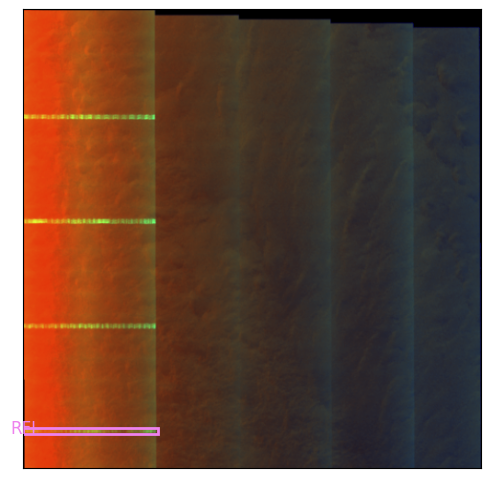

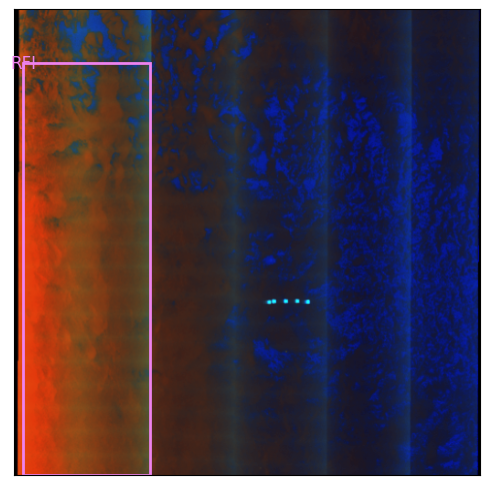

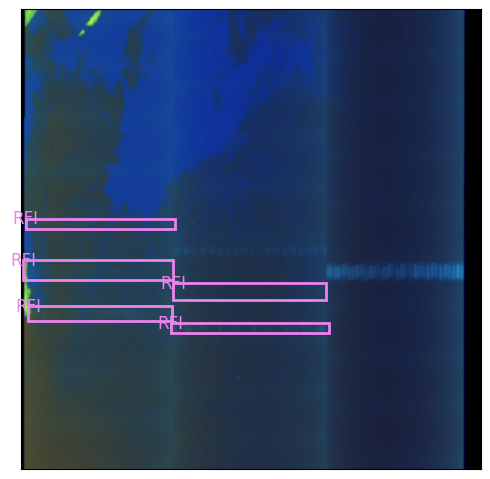

In [9]:
model_config = {
    "num_classes": 2,
    "learning_rate": 0.0001,
    "pretrained": True,
    "metrics": ["map"]
}
model = FasterRCNN(model_config)
model.prepare()

model_path = "/home/dragik/data/rfi/experiments/yolo/checkpoint.pth.tar"
labels = ['Other Anomaly','RFI']
transform = Resize()
model.load_model(model_path)

image = image_loader('/home/dragik/data/rfi/testing/images/S1A_EW_GRDM_1SDH_20221207T175401_20221207T175506_046229_05891F_DA92.SAFE.png')
fig = model.detect_objects(image, labels, transform)

image = image_loader('/home/dragik/data/rfi/testing/images/S1A_EW_GRDM_1SDV_20221014T073332_20221014T073432_045435_056EE5_4316.SAFE.png')
fig = model.detect_objects(image, labels, transform)

image = image_loader('/home/dragik/data/rfi/testing/images/S1A_IW_GRDH_1SDV_20230713T044826_20230713T044851_049400_05F0AE_7F17.SAFE.png')
fig = model.detect_objects(image, labels, transform)